In [40]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
data1 = pd.ExcelFile('C:\\Users\\Dell\\Desktop\\KPMG_VI_New_raw_data_update_final.xlsx')
data1

In [12]:
data_Tran=pd.read_excel(data1, 'Transactions',header=1)
data_Customer_Demo = pd.read_excel(data1, 'CustomerDemographic',header=1)
data_Customer_Add = pd.read_excel(data1, 'CustomerAddress',header=1)
data_NewCus= pd.read_excel(data1, 'NewCustomerList',header=1)

# Transaction Data

In [16]:
data_Tran.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [14]:
data_Tran.shape

(20000, 13)

In [15]:
data_Tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [18]:
data_Tran.duplicated().sum()

0

In [20]:
#check of uniqueness

data_Tran.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [22]:
#miss value check
data_Tran.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [36]:
(data_Tran.isnull().sum() /data_Tran.index.size) *100 

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

In [35]:
check_nan= data_Tran.notna().all(axis=1).sum()
print('not nan data',check_nan)
is_nan =(20000-check_nan)/20000
print('nan data',is_nan)

not nan data 19445
nan data 0.02775


In [ ]:
#As missing value percentage is very less so either we can impute or drop null values as per required.

In [37]:
data_Tran.dropna(inplace=True)

<AxesSubplot:>

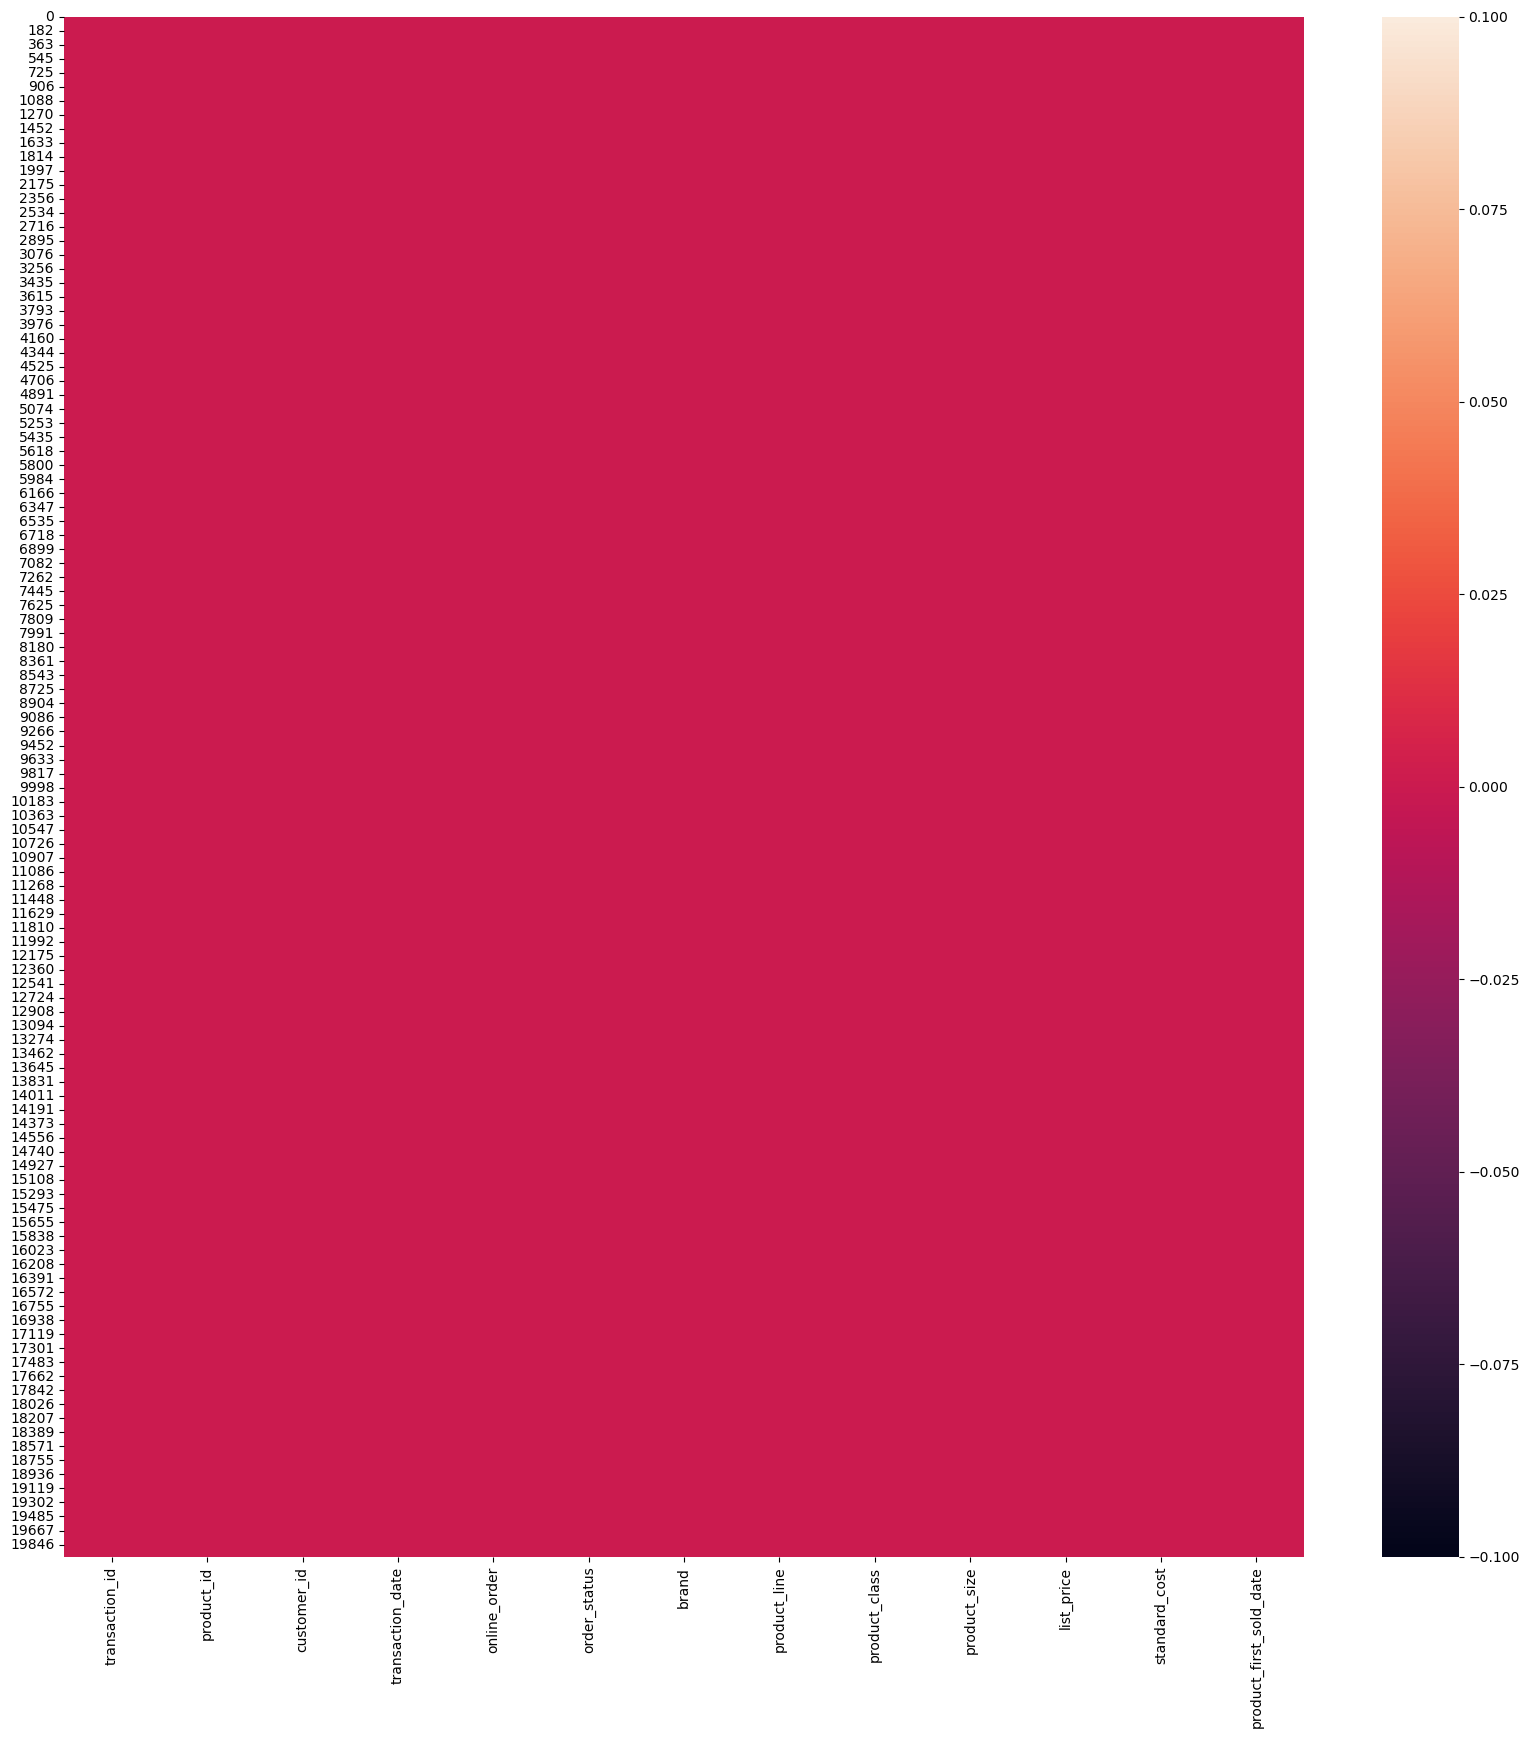

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(data_Tran.isnull())

In [43]:
data_Tran.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000
mean,9989.257393,45.797737,1739.467267,0.500849,1107.337193,555.585260,38201.758653
std,5779.669087,30.571996,1011.889153,0.500012,582.662400,405.596541,2878.067854
min,1.000000,0.000000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,4976.000000,18.000000,857.000000,0.000000,575.270000,215.140000,35667.000000
50%,9985.000000,45.000000,1741.000000,1.000000,1163.890000,507.580000,38216.000000
75%,14997.000000,72.000000,2615.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.000000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [ ]:
#There is difference between 75% quatile and max so outliers are present which we get rid of it.

In [47]:
for i in data_Tran.columns:
    check = data_Tran[i].value_counts()
    print(check)

1        1
13327    1
13325    1
13324    1
13323    1
        ..
6649     1
6648     1
6647     1
6646     1
20000    1
Name: transaction_id, Length: 19445, dtype: int64
0      1157
3       349
1       305
38      267
35      261
       ... 
73      134
16      134
8       132
100     126
47      118
Name: product_id, Length: 101, dtype: int64
1068    14
2476    14
2183    14
1302    13
2912    13
        ..
3392     1
2271     1
2328     1
1865     1
3161     1
Name: customer_id, Length: 3492, dtype: int64
2017-08-18    81
2017-02-14    81
2017-10-15    73
2017-01-31    72
2017-12-19    70
              ..
2017-08-29    37
2017-01-12    36
2017-09-25    35
2017-03-29    34
2017-10-19    32
Name: transaction_date, Length: 364, dtype: int64
1.0    9739
0.0    9706
Name: online_order, dtype: int64
Approved     19273
Cancelled      172
Name: order_status, dtype: int64
Solex             4169
WeareA2B          3245
Giant Bicycles    3244
OHM Cycles        2993
Trek Bicycles     2931
Norco 

In [49]:
data_Tran[data_Tran['product_id']==3].head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
15,16,3,2961,2017-10-10,0.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,37873.0
153,154,3,3383,2017-04-06,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,40784.0
164,165,3,2637,2017-10-25,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,38573.0
187,188,3,1597,2017-01-15,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41167.0


In [51]:
data_Tran['product_first_sold_date'] = pd.to_datetime(data_Tran['product_first_sold_date'])
data_Tran['product_first_sold_date'].head()

0   1970-01-01 00:00:00.000041245
1   1970-01-01 00:00:00.000041701
2   1970-01-01 00:00:00.000036361
3   1970-01-01 00:00:00.000036145
4   1970-01-01 00:00:00.000042226
Name: product_first_sold_date, dtype: datetime64[ns]

# CustomerDemographicdata

In [59]:
data_Customer_Demo

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


In [53]:
data_Customer_Demo.shape

(4000, 13)

In [54]:
data_Customer_Demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [55]:
(data_Customer_Demo.isnull().sum() /data_Customer_Demo.index.size) *100 

customer_id                             0.000
first_name                              0.000
last_name                               3.125
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     2.175
job_title                              12.650
job_industry_category                  16.400
wealth_segment                          0.000
deceased_indicator                      0.000
default                                 7.550
owns_car                                0.000
tenure                                  2.175
dtype: float64

In [57]:
data_Customer_Demo.duplicated().sum()

0

In [58]:
for i in data_Customer_Demo.columns:
    check = data_Customer_Demo[i].value_counts()
    print(check)

1       1
2672    1
2659    1
2660    1
2661    1
       ..
1339    1
1340    1
1341    1
1342    1
4000    1
Name: customer_id, Length: 4000, dtype: int64
Max         5
Tobe        5
Timmie      5
Kippy       4
Pail        4
           ..
Katy        1
Hakim       1
Fanchon     1
Jeanette    1
Sarene      1
Name: first_name, Length: 3139, dtype: int64
Pristnor     3
Ramsdell     3
Eager        2
Zisneros     2
Dredge       2
            ..
Whittock     1
Carwithen    1
Blas         1
Dearlove     1
Oldland      1
Name: last_name, Length: 3725, dtype: int64
Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64
16    56
19    56
67    54
20    54
2     50
      ..
8     28
95    27
85    27
86    27
92    24
Name: past_3_years_bike_related_purchases, Length: 100, dtype: int64
1978-01-30    7
1964-07-08    4
1962-12-17    4
1978-08-19    4
1977-05-13    4
             ..
1989-06-16    1
1998-09-30    1
1985-03-11    1
1989-10

In [77]:
data_Customer_Demo.loc[data_Customer_Demo['gender']=='U','gender']='Unspecified'
data_Customer_Demo.loc[data_Customer_Demo['gender']=='F','gender']='Female'
data_Customer_Demo.loc[data_Customer_Demo['gender']=='Femal','gender']='Female'
data_Customer_Demo.loc[data_Customer_Demo['gender']=='M','gender']='Male'

In [62]:
data_Customer_Demo

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,UnderAge,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


In [ ]:
#Gender columne was slight unstructured so we match the values as try maintain the accuracy of gender column.
#default column also has some random or ununderstandable values so we need more clarification about that column.

# CustomerAddress

In [63]:
data_Customer_Add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [65]:
data_Customer_Add.shape

(3999, 6)

In [66]:
data_Customer_Add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [67]:
(data_Customer_Add.isnull().sum() /data_Customer_Add.index.size) *100 

customer_id           0.0
address               0.0
postcode              0.0
state                 0.0
country               0.0
property_valuation    0.0
dtype: float64

In [ ]:
#No missing values

In [69]:
data_Customer_Add.duplicated().sum()

0

In [70]:
for i in data_Customer_Add.columns:
    check = data_Customer_Add[i].value_counts()
    print(check)

1       1
2676    1
2663    1
2664    1
2665    1
       ..
1343    1
1344    1
1345    1
1346    1
4003    1
Name: customer_id, Length: 3999, dtype: int64
3 Mariners Cove Terrace      2
3 Talisman Place             2
64 Macpherson Junction       2
359 Briar Crest Road         1
4543 Service Terrace         1
                            ..
5063 Shopko Pass             1
09 Hagan Pass                1
87897 Lighthouse Bay Pass    1
294 Lawn Junction            1
320 Acker Drive              1
Name: address, Length: 3996, dtype: int64
2170    31
2155    30
2145    30
2153    29
3977    26
        ..
3808     1
3114     1
4721     1
4799     1
3089     1
Name: postcode, Length: 873, dtype: int64
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64
Australia    3999
Name: country, dtype: int64
9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     

In [71]:
data_Customer_Add.loc[data_Customer_Add['state']=='New South Wales','state']='NSW'
data_Customer_Add.loc[data_Customer_Add['state']=='Victoria','state']='VIC'

In [ ]:
#Here data seems to be clean except state column where NSW and NEw South wales seems to same. hence the state adjustment is done.

# New Customer list

In [72]:
data_NewCus.shape

(1000, 23)

In [73]:
data_NewCus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [74]:
data_NewCus.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,0.747770,0.839610,0.945304,0.872405,498.819000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,0.206217,0.250038,0.302607,0.286893,288.810997,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,0.400000,0.400000,0.400000,0.340000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,0.570000,0.630000,0.703125,0.650000,250.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,0.750000,0.820000,0.937500,0.854250,500.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,0.930000,1.030000,1.140625,1.050000,750.250000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1.100000,1.375000,1.718750,1.703125,1000.000000,1000.000000,1.718750


In [ ]:
#data seems no outlier present or less no.of ouliers

In [75]:
(data_NewCus.isnull().sum() /data_NewCus.index.size) *100 

first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Unnamed: 16                             0.0
Unnamed: 17                             0.0
Unnamed: 18                             0.0
Unnamed: 19                             0.0
Unnamed: 20                             0.0
Rank                                    0.0
Value                           

In [76]:
data_NewCus.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,1.06,1.325,1.65625,1.407813,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.77,0.770,0.96250,0.818125,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.54,0.540,0.54000,0.540000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,1.00,1.250,1.25000,1.250000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.46,0.460,0.57500,0.575000,4,4,1.703125


In [ ]:
#Clarrification required about Unnnamed columns as they have some values which may  
#impact our analysis hence clarification required is we will drop those columns.

In [78]:
data_NewCus.loc[data_NewCus['gender']=='U','gender']='Unspecified'

In [79]:
data_NewCus.duplicated().sum()

0